# 特定領域偵測服務操作

## domain: celebrities

In [1]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

# Set API key.
subscription_key = '29773b9c2ca448ff9eab8c811b833d3a'
# Set endpoint.
endpoint = 'https://cvisaac60103.cognitiveservices.azure.com/'
# Call API
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))


'''
Detect Domain-specific Content - remote
This example detects celebrites and landmarks in remote images.
'''
print("===== Detect Domain-specific Content - remote =====")
# URL of one or more celebrities
remote_image_url_celebs = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"
# Call API with content type (celebrities) and URL
detect_domain_results_celebs_remote = computervision_client.analyze_image_by_domain("celebrities", remote_image_url_celebs)

# Print detection results with name
print("Celebrities in the remote image:")
if len(detect_domain_results_celebs_remote.result["celebrities"]) == 0:
    print("No celebrities detected.")
else:
    for celeb in detect_domain_results_celebs_remote.result["celebrities"]:
        print(celeb["name"])

===== Detect Domain-specific Content - remote =====
Celebrities in the remote image:
Bern Collaco


## domain: landmarks

In [2]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

# Set API key.
subscription_key = '29773b9c2ca448ff9eab8c811b833d3a'
# Set endpoint.
endpoint = 'https://cvisaac60103.cognitiveservices.azure.com/'
# Call API
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

remote_image_url = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"

# Call API with content type (landmarks) and URL
detect_domain_results_landmarks = computervision_client.analyze_image_by_domain("landmarks", remote_image_url)
print()

print("Landmarks in the remote image:")
if len(detect_domain_results_landmarks.result["landmarks"]) == 0:
    print("No landmarks detected.")
else:
    for landmark in detect_domain_results_landmarks.result["landmarks"]:
        print(landmark["name"])


Landmarks in the remote image:
Colosseum


# 色彩配置偵測服務操作

In [4]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

# Set API key.
subscription_key = '29773b9c2ca448ff9eab8c811b833d3a'
# Set endpoint.
endpoint = 'https://cvisaac60103.cognitiveservices.azure.com/'
# Call API
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

'''
Detect Color - remote
This example detects the different aspects of its color scheme in a remote image.
'''
print("===== Detect Color - remote =====")
# Select the feature(s) you want
remote_image_features = ["color"]
# Call API with URL and features
detect_color_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print results of color scheme
print("Getting color scheme of the remote image: ")
print("Is black and white: {}".format(detect_color_results_remote.color.is_bw_img))
print("Accent color: {}".format(detect_color_results_remote.color.accent_color))
print("Dominant background color: {}".format(detect_color_results_remote.color.dominant_color_background))
print("Dominant foreground color: {}".format(detect_color_results_remote.color.dominant_color_foreground))
print("Dominant colors: {}".format(detect_color_results_remote.color.dominant_colors))

===== Detect Color - remote =====
Getting color scheme of the remote image: 
Is black and white: False
Accent color: 486A83
Dominant background color: White
Dominant foreground color: Grey
Dominant colors: ['Grey', 'White']


# 智慧裁切縮圖服務操作

Thumbnail is 50-by-50


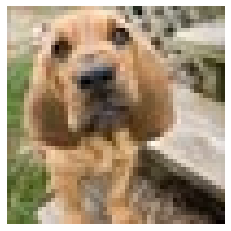

In [5]:
import os
import sys
import requests
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO


# Set API key.
subscription_key = '29773b9c2ca448ff9eab8c811b833d3a'
# Set endpoint.
endpoint = 'https://cvisaac60103.cognitiveservices.azure.com/'

thumbnail_url = endpoint + "vision/v2.1/generateThumbnail"

# Set image_url to the URL of an image that you want to analyze.
image_url = "https://upload.wikimedia.org/wikipedia/commons/9/94/Bloodhound_Puppy.jpg"

headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'width': '50', 'height': '50', 'smartCropping': 'true'}
data = {'url': image_url}
response = requests.post(thumbnail_url, headers=headers,
                         params=params, json=data)
response.raise_for_status()

thumbnail = Image.open(BytesIO(response.content))

# Display the thumbnail.
plt.imshow(thumbnail)
plt.axis("off")

# Verify the thumbnail size.
print("Thumbnail is {0}-by-{1}".format(*thumbnail.size))